<a href="https://colab.research.google.com/github/GabrielCdev/Exploratory_Analysis/blob/main/Desafio_4_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória de dados com Pandas

Escolher uma base de dados real e realizar as seguintes atividades:

1 - Descrever a base e todos os atributos;

2- Limpeza inicial dos dados
- Remover linhas duplicadas;
- Correção dos tipos de dados dos atributos;
- Identificar e tratar dados ausentes (lembrar que podem existir dados ausentes que não sejam nulos, ex.: peso com valor 0, strings como "-", etc.) e tratar (exclusão, preencher com mediana ou, se série temporal, com o valor imediatamente anterior ou posterior);
- Identificar outliers e, se necessário, tratá-los.
- Lembrem-se que outliers podem ser reais, como um salário do presidente da empresa, ou fruto de erros, como uma pessoa com 250 anos. Outliers reais podem ser mantidos em fase de análise exploratória para compreensão dos dados, outliers provenientes de erros devem ser tratados, seja com exclusão ou preenchimento (similar ao tratamento de dados ausentes).

3 - Análise univariada: analisar a distribuição de todos os atributos de acordo com o tipo de informação que eles trazem (atributos contínuos e categóricos são analisados de forma diferente).
Exemplos de análises:
- Identificar presença de outliers;
- Desbalanceamento entre categorias (atributos categóricos);
- Os dados seguem uma distribuição normal? (atributos contínuos);
- Relação entre média, mediana, máximo, mínimo...

4 - Análise bivariada:
- Identificar quais atributos são mais correlacionados;
- Escolher um atributo target, analisar os dados em função dele e destacar os insights que tiveram;
- Durante esse processo vocês devem responder pelo menos 7 perguntas envolvendo:
- 2 atributos categóricos;
- 2 atributos contínuos;
- 1 atributo contínuo x 1 atributo categórico.

Postem o notebook e o conjunto de dados. A organização do código, legibilidade e documentação são quesitos avaliativos. Lembrem-se de destacar sempre o que vocês observaram nas tabelas e gráficos gerados.

Basta uma pessoa postar o trabalho por equipe.


Grupo 4

....:::: Membros ::::....

*   Ane Caroline Teixeira
*   Danilo Lima Souza
*   Gabriel Borges Calheiros
*   Guilherme Cruz
*   Izadora de Oliveira Machado Paim
*   Laianne Protasio




##Objetivo

O objetivo central desta análise é compreender o padrão de lucro gerado pelas vendas de bicicletas e acessórios em geral a partir dos índices de país, grupo de idade, ano, categoria do produto, gênero do cliente, dentre outros.

## Importação de Dados

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
bike_sales_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/Exploratory_Analysis/main/Dataset/Sales.csv')

In [ ]:
backup = bike_sales_df.copy()

In [ ]:
plt.style.use('seaborn-whitegrid')

In [ ]:
mpl.rcParams["figure.figsize"] = [12, 8]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

## Análise Geral

In [ ]:
bike_sales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [ ]:
bike_sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
bike_sales_df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [ ]:
bike_sales_df.isna().values.any()

False

In [ ]:
bike_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

Até aqui podemos tirar algumas informações:

1. O dataset possui 18 colunas e 113036 linhas;
2. Os dados estão indexados de forma sequencial de 0 a 113035;
3. Não existem dados nulos (**o que não significa que não existam dados ausentes**);
4. Durante a análise minusciosa dos dados foi percebido que há uma coluna ausente, referente à depreciação, culminando no resultado da coluna "profit" (lucro).
5. O atributo "profit" (lucro), principal objeto de análise deste trabalho, é int64;
6. Os atributos "Age_Group" (Grupo de Idade), "Customer_Gender" (Gênero do Cliente), "Country" (País), "State" (Estado), "Product_Category" (Categoria do Produto) e "Sub_Category" (Subcategoria) são do tipo `object`, mas seu conteúdo é **category**;
7. Similar aos atributos listados no item 6, as colunas "Day" (Dia) e "Year" (Ano) também são classificados como **category** ao invés de `object`;
8. Os atributos "Unit_Cost" (Custo Unitário), "Unit_Price" (Preço Unitário), "Profit" (Lucro), "Cost" (Custo) e "Revenue" (Receita) são do tipo 'int64', mas seu conteúdo é **float**.
9. A maioria das informações disponíveis são relacionadas ao consumo de produtos de ciclismo.



Os dados da tabela representam:

1. Date: Data em que a venda ocorreu;
2. Day: Dia em que a venda ocorreu;
3. Month: Mês em que a venda ocorreu;
4. Year: Ano em que a venda ocorreu;
5. Customer_Age: Idade do cliente;
6. Age_Group: Idade do cliente agrupada em categorias (4);
7. Customer_Gender: Gênero do cliente;
8. Country: País onde ocorreu a venda;
9. State: Estado onde ocorreu a venda;
10. Product_Category: Categoria do produto (bicicleta, acessórios, roupas etc);
11. Sub_Category: Descrição mais detalhada do produto (Suporte para bicicletas, coletes refletivos etc);
12. Product: Nome específico do produto;
13. Order_Quantity: Quantidade total da encomenda;
14. Unit_Cost: Custo unitário de cada produto;
15. Unit_Price: Preço unitário de cada produto;
16. Profit: Lucro total obtido nos produtos vendidos;
17. Cost: Custo total do número do pedido do produto;
18. Revenue: Receita total do pedido individual.

In [ ]:
bike_sales_df.duplicated().values.any()

True

In [ ]:
bike_sales_df = bike_sales_df.drop_duplicates()

In [ ]:
# Before = 113036 rows × 18 columns
bike_sales_df.shape

(112036, 18)

In [ ]:
bike_sales_df.duplicated().values.any()

False

### Tradução das colunas:

In [ ]:
bike_sales_df = bike_sales_df.rename(columns={
    'Date': 'Data',
    'Day': 'Dia',
    'Month': 'Mês', 
    'Year': 'Ano',
    'Customer_Age': 'Idade do Cliente',
    'Age_Group': 'Grupo de Idades',
    'Customer_Gender': 'Gênero do Cliente',
    'Country': 'País',
    'State': 'Estado',
    'Product_Category': 'Categoria do Produto',
    'Sub_Category': 'Subcategoria',
    'Product': 'Produto',
    'Order_Quantity': 'Quantidade do Pedido',
    'Unit_Cost': 'Custo Unitário',
    'Unit_Price': 'Preço Unitário',
    'Profit': 'Lucro',
    'Cost': 'Custo',
    'Revenue': 'Receita'
})

In [ ]:
bike_sales_df

,Data,Dia,Mês,Ano,Idade do Cliente,Grupo de Idades,Gênero do Cliente,País,Estado,Categoria do Produto,Subcategoria,Produto,Quantidade do Pedido,Custo Unitário,Preço Unitário,Lucro,Custo,Receita
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


### Conversão de conteúdos:

In [ ]:
# Convertendo os conteúdos de 'object' para 'category':

bike_sales_df['Dia'] = bike_sales_df['Dia'].astype('category')
bike_sales_df['Ano'] = bike_sales_df['Ano'].astype('category')
bike_sales_df['Grupo de Idades'] = bike_sales_df['Grupo de Idades'].astype('category')
bike_sales_df['Gênero do Cliente'] = bike_sales_df['Gênero do Cliente'].astype('category')
bike_sales_df['País'] = bike_sales_df['País'].astype('category')
bike_sales_df['Estado'] = bike_sales_df['Estado'].astype('category')
bike_sales_df['Categoria do Produto'] = bike_sales_df['Categoria do Produto'].astype('category')
bike_sales_df['Subcategoria'] = bike_sales_df['Subcategoria'].astype('category')

bike_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Data                  112036 non-null  object  
 1   Dia                   112036 non-null  category
 2   Mês                   112036 non-null  object  
 3   Ano                   112036 non-null  category
 4   Idade do Cliente      112036 non-null  int64   
 5   Grupo de Idades       112036 non-null  category
 6   Gênero do Cliente     112036 non-null  category
 7   País                  112036 non-null  category
 8   Estado                112036 non-null  category
 9   Categoria do Produto  112036 non-null  category
 10  Subcategoria          112036 non-null  category
 11  Produto               112036 non-null  object  
 12  Quantidade do Pedido  112036 non-null  int64   
 13  Custo Unitário        112036 non-null  int64   
 14  Preço Unitário        112036 non-nul

In [ ]:
# Convertendo os conteúdos de 'int64' para 'float64':

#bike_sales_df['Quantidade do Pedido'] = bike_sales_df['Quantidade do Pedido'].astype('float64')
bike_sales_df['Custo Unitário'] = bike_sales_df['Custo Unitário'].astype('float64')
bike_sales_df['Preço Unitário'] = bike_sales_df['Preço Unitário'].astype('float64')
bike_sales_df['Lucro'] = bike_sales_df['Lucro'].astype('float64')
bike_sales_df['Custo'] = bike_sales_df['Custo'].astype('float64')
bike_sales_df['Receita'] = bike_sales_df['Receita'].astype('float64')

bike_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Data                  112036 non-null  object  
 1   Dia                   112036 non-null  category
 2   Mês                   112036 non-null  object  
 3   Ano                   112036 non-null  category
 4   Idade do Cliente      112036 non-null  int64   
 5   Grupo de Idades       112036 non-null  category
 6   Gênero do Cliente     112036 non-null  category
 7   País                  112036 non-null  category
 8   Estado                112036 non-null  category
 9   Categoria do Produto  112036 non-null  category
 10  Subcategoria          112036 non-null  category
 11  Produto               112036 non-null  object  
 12  Quantidade do Pedido  112036 non-null  int64   
 13  Custo Unitário        112036 non-null  float64 
 14  Preço Unitário        112036 non-nul

## Análise Univariada

In [ ]:
ano = bike_sales_df['Ano'].tolist()
idade_cliente = bike_sales_df['Idade do Cliente'].tolist()
genero_cliente = bike_sales_df['Gênero do Cliente'].tolist()
pais = bike_sales_df['País'].tolist()
estado = bike_sales_df['Estado'].tolist()
categoria_produto = bike_sales_df['Categoria do Produto'].tolist()
subcategoria = bike_sales_df['Subcategoria'].tolist()

In [ ]:
bike_sales_df.describe()

,Idade do Cliente,Quantidade do Pedido,Custo Unitário,Preço Unitário,Lucro,Custo,Receita
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000



- Pode-se observar que os dados referentes a "Idade do Cliente" e "Quantidade do Pedido" estão bem distribuídos e não há presença de outliers. A média de idade dos clientes é de, aproximadamente, 35 anos.
- O "Custo Unitário", "Preço Unitário", "Lucro", "Custo" e "Receita" possuem dados que tendem a não seguir uma distribuição normal devido a diferença entre a mediana e a média.
- É notada a possibilidade de existir um outlier nos atributos "Custo Unitário", "Preço Unitário", "Lucro", "Custo" e "Receita", embora a causa ainda seja desconhecida.
- Observando a coluna de "Lucro", há indícios que a empresa obteve prejuízo, porém ainda não é possível verificar se é um caso isolado.


## Análise multivariada

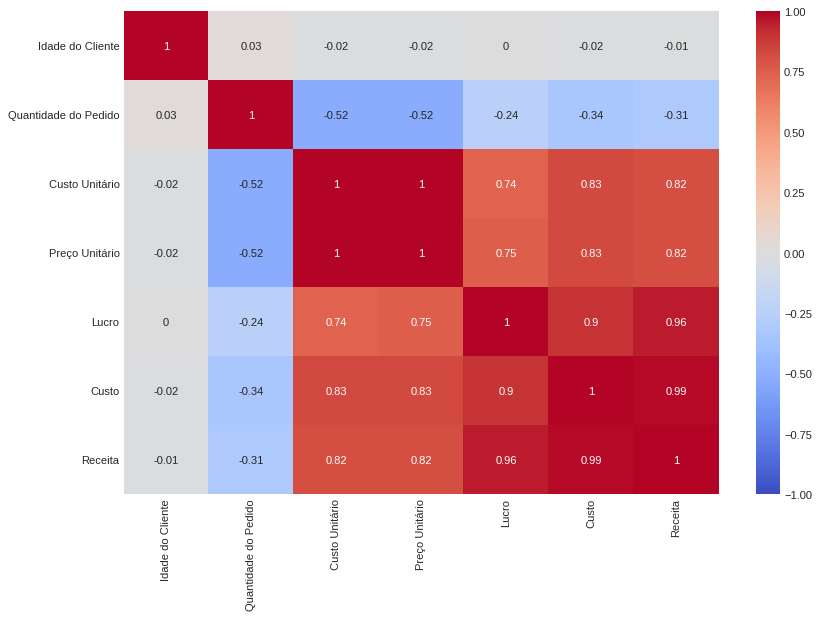

In [ ]:
fig = plt.figure()

sns.heatmap(round(bike_sales_df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

A princípio, a matriz de correlação permite observar algumas tendências, mas ainda não é possível chegar a uma conclusão:

- A idade do cliente não apresenta correlação com os demais dados relacionados com a rentabilidade da empresa, como a receita, principalmente;

- A quantidade do pedido se apresenta como inversamente proporcional ao lucro e possui baixa correlação com o mesmo. Em contrapartida, o custo unitário é diretamente proporcional ao lucro. Para ambas variáveis, este resultado é contraintuitivo.

- O preço unitário e a receita se apresentam como diretamente proporcionais ao lucro. Sendo esses dois resultados coerentes com o que se espera de resultado da empresa.

Atributo target: **lucro**

### 2 atributos categóricos;

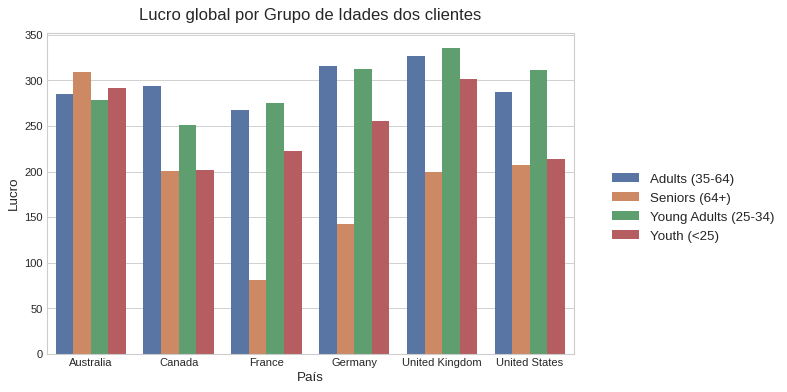

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= bike_sales_df, x='País', y='Lucro', hue='Grupo de Idades',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Lucro global por Grupo de Idades dos clientes',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

*   Como foi observado no gráfico anterior, os Estados Unidos se sobressai em todos grupos de idades comparado aos demais países;
*   É visto também que os Adultos (35-64 anos) e os Jovens Adultos (25-34) são os que mais contribuem para venda de bicicleta;

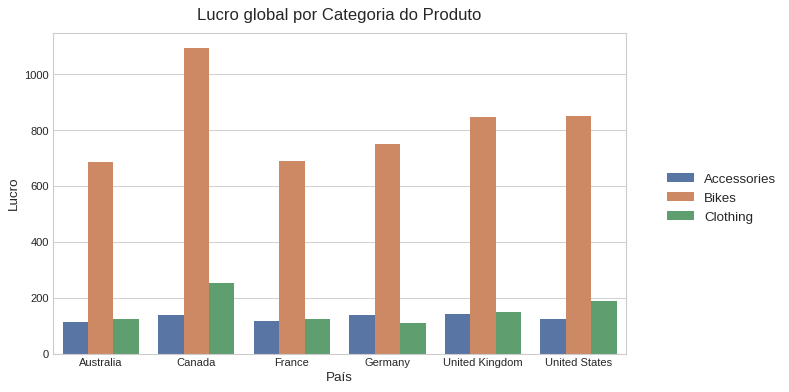

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= bike_sales_df, x='País', y='Lucro', hue='Categoria do Produto',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Lucro global por Categoria do Produto',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

*   É observado em todos os países o predomínio na compra por bicicletas em relação aos demais produtos.
*   O Canadá possui um lucro maior na venda de bicicletas.



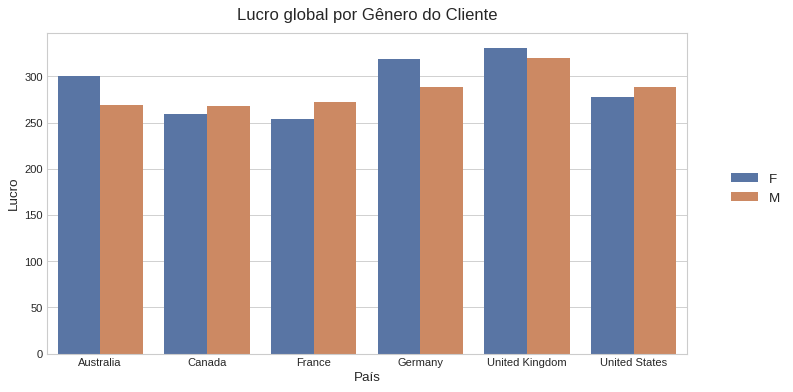

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= bike_sales_df, x='País', y='Lucro', hue='Gênero do Cliente',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Lucro global por Gênero do Cliente',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

Nota-se que não existe uma predominância de gênero em relação ao lucro:

*   Na Austrália, Alemanhã e Reino Unido, as mulheres têm mais influência no lucro;
*   No Canadá, França e Estados Unidos, os homens têm mais influência no lucro.

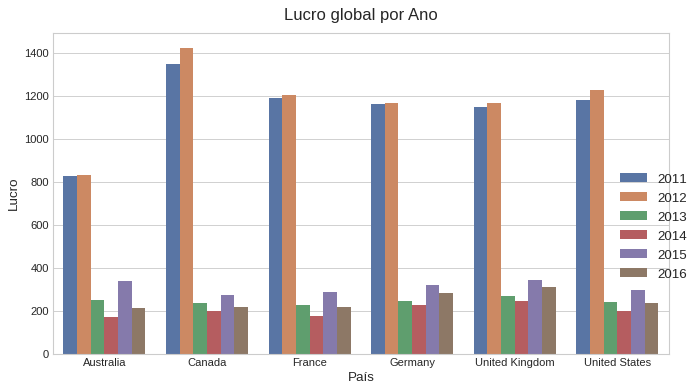

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=bike_sales_df, x='País', y='Lucro', hue='Ano',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Lucro global por Ano',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

- Observa-se que os anos mais significativos foram 2011 e 2012 para todos os países.
- Austrália, França, Alemanha e Reino Unido obtiveram lucros muito próximos para ambos os anos.
- Vale ressaltar que, ainda nesse intervalo de datas, a Austrália foi o país que teve o menor nível de lucro em relação aos demais.
- Nos demais anos não houveram diferenças destacáveis.

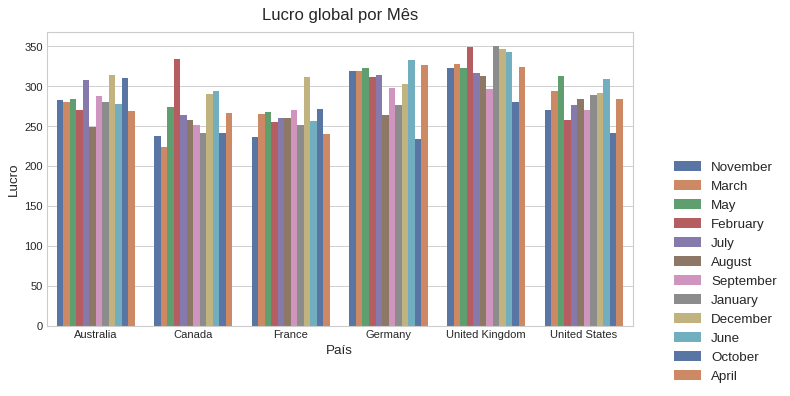

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= bike_sales_df, x='País', y='Lucro', hue='Mês',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Lucro global por Mês',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

- Agosto é o mês em que se obteve o menor resultado de lucro entre os países.
- No mês de fevereiro, Canadá e Reino Unido tiveram índices disparados de lucro.
- Em dezembro, os países que possuíram o maior lucro foram a Austrália e França.

###2 atributos contínuos;

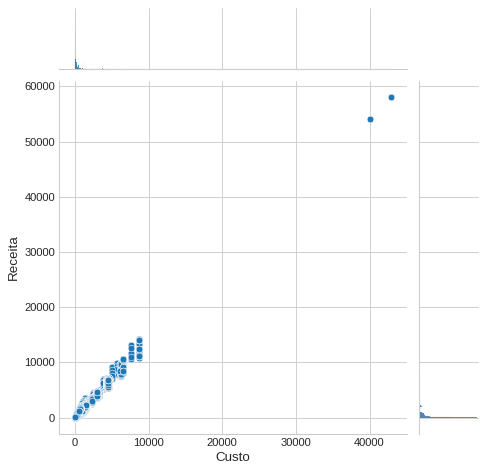

In [ ]:
sns.jointplot(x='Custo', y='Receita', 
              data=bike_sales_df, kind='scatter');

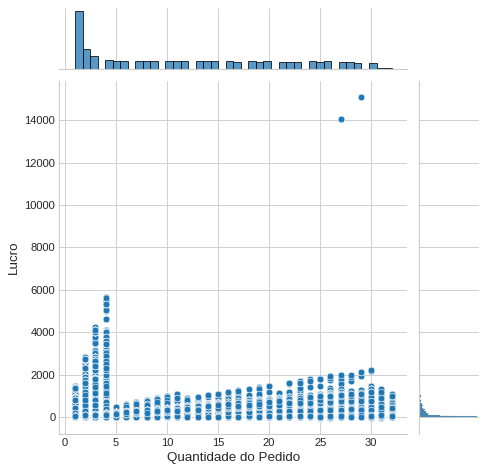

In [ ]:
sns.jointplot(x='Quantidade do Pedido', y='Lucro', 
              data=bike_sales_df, kind='scatter');

Neste gráfico, podemos confirmar as análises que vimos anteriormente que o preço unitário e a receita se apresentam como diretamente proporcionais ao lucro. Sendo esses dois resultados coerentes com o que se espera de resultado da empresa. Bem como a existência de outlier nos atributos "Custo" e "Receita".

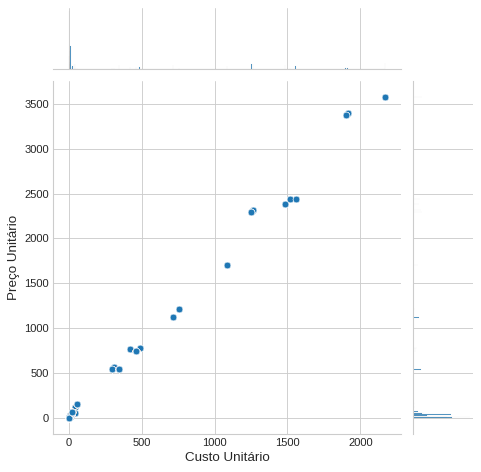

In [ ]:
sns.jointplot(x='Custo Unitário', y='Preço Unitário', 
              data=bike_sales_df, kind='scatter');

Neste gráfico, podemos confirmar as análises que vimos anteriormente que o preço unitário e a receita se apresentam como diretamente proporcionais ao lucro. Sendo esses dois resultados coerentes com o que se espera de resultado da empresa. Bem como a existência de outlier nos atributos "Custo Unitário" e "Preço Unitário".

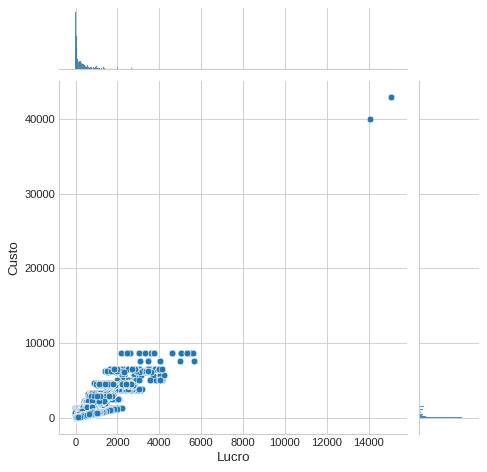

In [ ]:
sns.jointplot(x='Lucro', y='Custo', 
              data=bike_sales_df, kind='scatter');

Como resultado temos um gráfico que reforça a correlação entre essas variáveis. Essa figura possui uma tendência crescente entre os eixos caracterizando esse comportamento. 
O gráfico confirma também, mais uma vez, a existência de outlier nos atributos "Custo" e "Lucro".

###1 atributo contínuo x 1 atributo categórico.

In [ ]:
bikes = bike_sales_df[bike_sales_df["Categoria do Produto"] == 'Bikes'][['Ano', 'Quantidade do Pedido']]

bikes

,Ano,Quantidade do Pedido
49304,2013,1
49305,2015,1
49306,2013,1
49307,2015,2
49308,2013,1
...,...,...
112067,2016,3
112068,2014,1
112069,2016,2
112070,2014,1


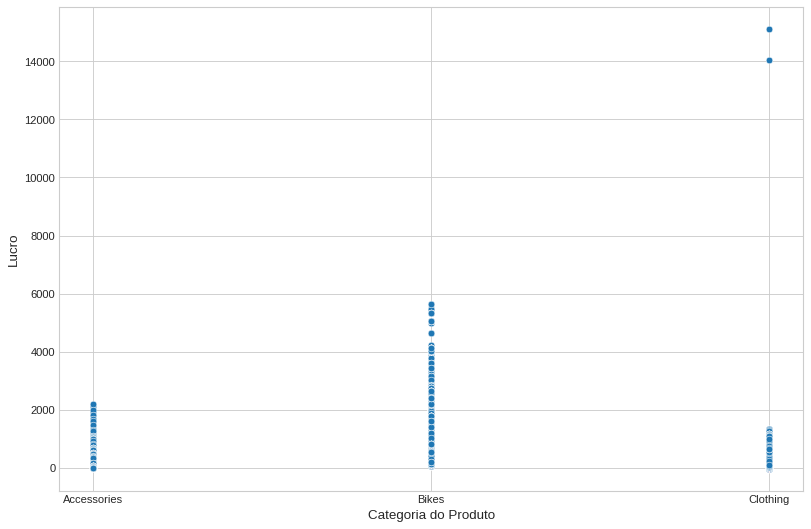

In [ ]:
sns.scatterplot(x='Categoria do Produto', y='Lucro', data=bike_sales_df)

Neste gráfico, podemos confirmar o resultado esperado de que a venda das bicicletas é o que mais contribui para o lucro das empresas. 
Podemos obersar também um outlier na venda das roupas.

##Principais informações obtidas dos dados

- Para todos os países, os maiores lucros ficaram concentrados nos anos de 2011 e 2012 sem precedentes e, após esse período, o lucro para todos mantiveram-se em torno do valor de média;
- A Austrália e Alemanha são os dois países onde existem as maiores diferenças de contribuição no lucro global entre os gêneros. Estes dois países, incluindo o Reino Unido, tiveram maior presença do público feminino no resultado do lucro;
- Nos anos de 2011 e 2012 o Canadá e os Estados Unidos foram os países que detiveram os maiores lucros sendo estes atrelados aos adultos e jovens adultos, respectivamente. Observa-se por sua vez, sem considerar ao quesito de tempo, que a França e a Alemanha são os países em que o público com 64+ são os menores contribuíntes em relação ao lucro;
- A bicicleta foi, por unanimidade, o produto que mais contribuiu com o lucro em todos os países;
- Por unanimidade, em Agosto é o mês em que obteve-se o menor resultado de lucro entre os países. Em fevereiro, o maior lucro foi observado no Canadá e Reino Unido. E em dezembro, os países que possuíram o maior lucro foram a Austrália e França;
- Foi visto que os atributos mais correlacionados com Lucro foram os Custo, Preço Unitário e Receita.